# **Libraries**

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [ ]:
import os
import cv2
import random
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
from scipy.ndimage import rotate
from keras import backend as K
from keras.models import Model,Sequential
from keras.layers import Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Reshape,GlobalAveragePooling2D,ZeroPadding2D,MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.layers import Bidirectional, LSTM
from keras.layers import Lambda, Activation, BatchNormalization,Add
# from keras.optimizers import Adam,SGD
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Flatten
from keras.initializers import glorot_uniform
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from google.colab.patches import cv2_imshow
%matplotlib inline

# **Arabic Charecter Classification :**


*   Dataset : Arabic handwritten Kaggle Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/arabic/dataset'

train_arabic_datas_path = '/content/drive/MyDrive/arabic/dataset/csvTrainImages 13440x1024.csv'
train_arabic_labels_path ='/content/drive/MyDrive/arabic/dataset/csvTrainLabel 13440x1.csv'

test_arabic_datas_path = '/content/drive/MyDrive/arabic/dataset/csvTestImages 3360x1024.csv'
test_arabic_labels_path ='/content/drive/MyDrive/arabic/dataset/csvTestLabel 3360x1.csv'

In [ ]:
training_letters_images = pd.read_csv(train_arabic_datas_path , header=None)
training_letters_labels= pd.read_csv(train_arabic_labels_path, header = None)
# print(len(train_arabic_labels))

testing_letters_images = pd.read_csv(test_arabic_datas_path , header = None)
testing_letters_labels = pd.read_csv(test_arabic_labels_path , header = None)
# print(len(test_arabic_datas))
# print(len(test_arabic_labels))

print(training_letters_images.shape[0])
print(testing_letters_images.shape[0])
print(training_letters_images[0:10])
train_arabic_datas.head()

13440
3360
   0     1     2     3     4     5     ...  1018  1019  1020  1021  1022  1023
0     0     0     0     0     0     0  ...     0     0     0     0     0     0
1     0     0     0     0     0     0  ...     0     0     0     0     0     0
2     0     0     0     0     0     0  ...     0     0     0     0     0     0
3     0     0     0     0     0     0  ...     0     0     0     0     0     0
4     0     0     0     0     0     0  ...     0     0     0     0     0     0
5     0     0     0     0     0     0  ...     0     0     0     0     0     0
6     0     0     0     0     0     0  ...     0     0     0     0     0     0
7     0     0     0     0     0     0  ...     0     0     0     0     0     0
8     0     0     0     0     0     0  ...     0     0     0     0     0     0
9     0     0     0     0     0     0  ...     0     0     0     0     0     0

[10 rows x 1024 columns]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def pixels_to_images(image_values,show = False):
  pixels = np.asarray(image_values)
  pixels = pixels.reshape(32,32).astype('uint8')

  pixels = np.flip(pixels, 0)
  pixels = rotate(pixels, -90)

  image = Image.fromarray(pixels)
  if show :
    image.show()
  return image

showing some samples randomly 

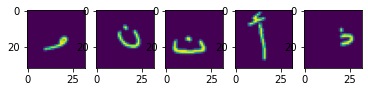

In [ ]:
for i in range(5):
  rand = random.randint(1,training_letters_images.shape[0])
  img = pixels_to_images(training_letters_images.loc[rand])
  ax=plt.subplot(1,5,i+1)
  plt.imshow(img)

Data proccessing:


In [ ]:
training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')


print(training_letters_images_scaled.shape)
print(training_letters_labels.shape)
print(testing_letters_images_scaled.shape)
print(testing_letters_labels.shape)

training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 32, 32, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 32, 32, 1])

print(training_letters_images_scaled.shape, testing_letters_images_scaled.shape)

(13440, 1024)
(13440, 1)
(3360, 1024)
(3360, 1)
(13440, 32, 32, 1) (3360, 32, 32, 1)


one hot encoding


In [ ]:
from tensorflow.keras.utils import to_categorical
class_num = 29 
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=class_num)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=class_num)
print(training_letters_labels_encoded[0])

print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
(13440, 32, 32, 1) (13440, 29) (3360, 32, 32, 1) (3360, 29)


In [ ]:
training_data_images =training_letters_images_scaled
training_data_labels = training_letters_labels_encoded
testing_data_images =testing_letters_images_scaled
testing_data_labels = testing_letters_labels_encoded

cnn approach


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  model = Sequential()
  model.add(Conv2D(filters=8, kernel_size=3, padding='same', input_shape=(32, 32, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=16, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=1))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  model.add(Dense(29, activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_384 (Conv2D)          (None, 32, 32, 8)         80        
_________________________________________________________________
batch_normalization_384 (Bat (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_384 (MaxPoolin (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_384 (Dropout)        (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_385 (Conv2D)          (None, 32, 32, 16)        1168      
_________________________________________________________________
batch_normalization_385 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_385 (MaxPoolin (None, 32, 32, 16)      

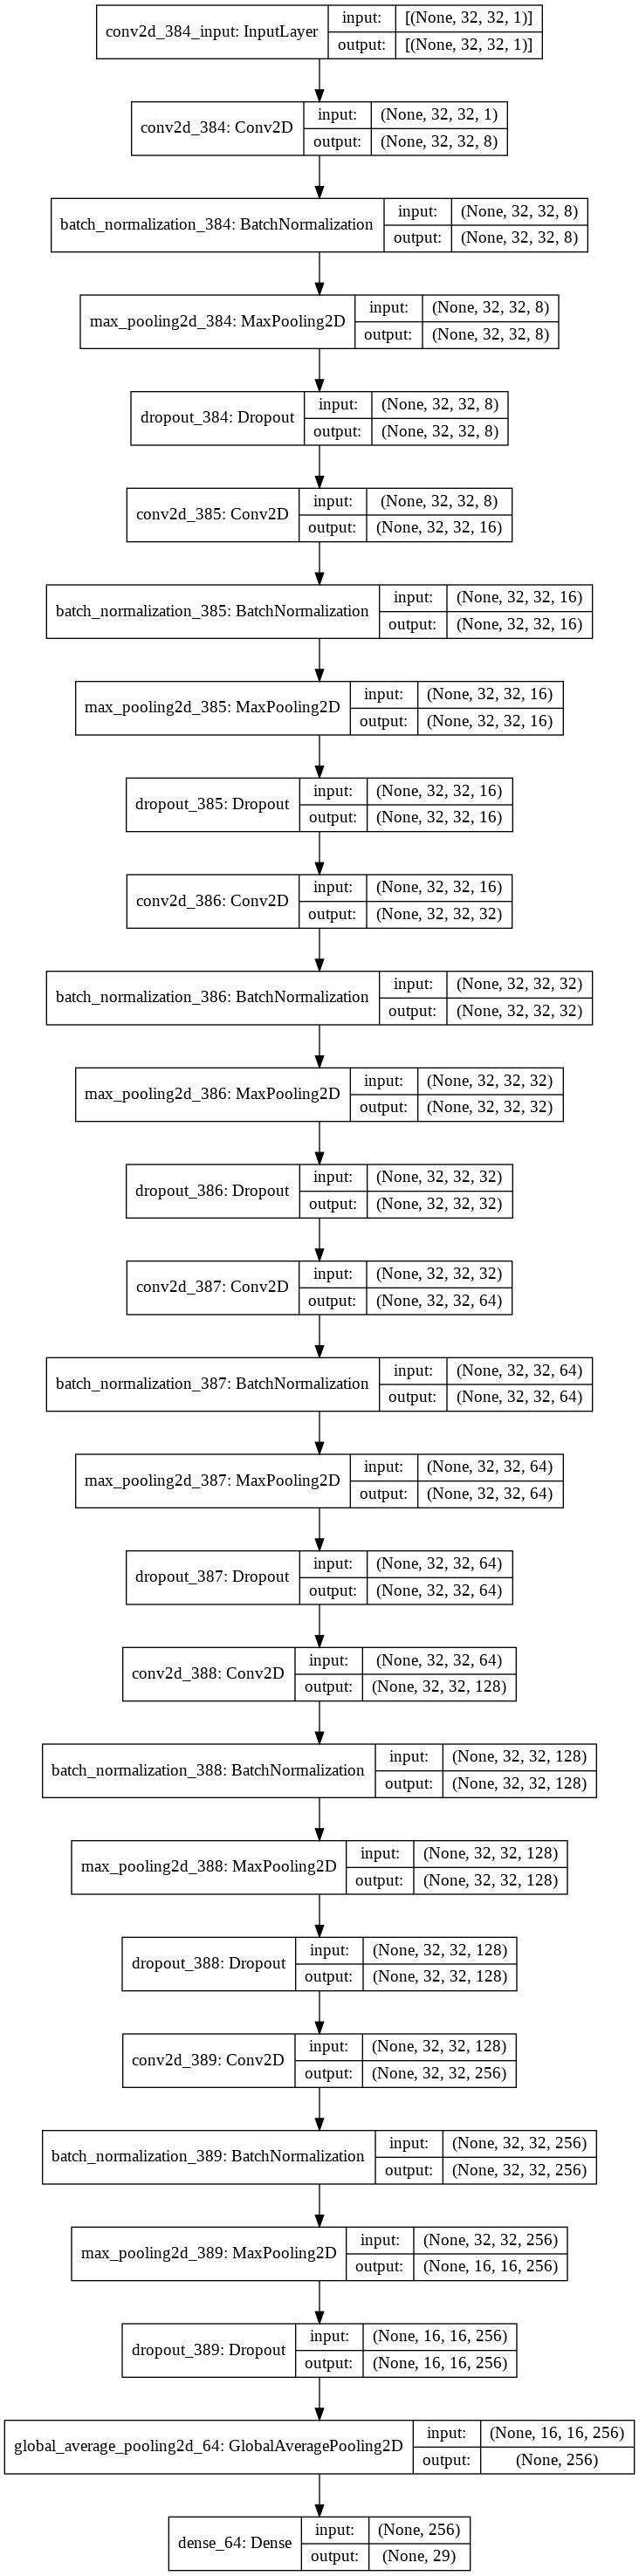

In [ ]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image as IPythonImage
plot_model(model, to_file="model.png", show_shapes=True)
plt.show('model.png')
display(IPythonImage('model.png'))

## Parameters Tuning

In [ ]:

seed = 5
np.random.seed(seed)

optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam','SGD']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh','sigmoid']

params_dict = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

total = 1
for i in params_dict:
  total = total * len(params_dict[i]) 
print("Number of tuning = {}".format(total))

Number of tuning = 40


In [ ]:
epochs = 5
batch_size = 20
print(len(train_arabic_labels))
print(len(train_arabic_datas))
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("result = {}".format(params))

13440
13440
{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 15s 18ms/step - loss: 2.0990 - accuracy: 0.3868 - val_loss: 1.9967 - val_accuracy: 0.3863
Epoch 2/5
672/672 [==============================] - 11s 16ms/step - loss: 0.4680 - accuracy: 0.8686 - val_loss: 2.5711 - val_accuracy: 0.4396
Epoch 3/5
672/672 [==============================] - 11s 16ms/step - loss: 0.2794 - accuracy: 0.9211 - val_loss: 0.4929 - val_accuracy: 0.8327
Epoch 4/5
672/672 [==============================] - 11s 16ms/step - loss: 0.2260 - accuracy: 0.9309 - val_loss: 8.0678 - val_accuracy: 0.2393
Epoch 5/5
672/672 [==============================] - 11s 17ms/step - loss: 0.1720 - accuracy: 0.9491 - val_loss: 17.8757 - val_accuracy: 0.1289
result = {'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [======

approach is :
 from above we can conclude that nadam potimizer and adam performed better but nadam has a rate which is bigger than adam
 


In [ ]:
model = create_model(optimizer='Nadam', kernel_initializer='uniform', activation='relu')

train the model :


In [ ]:
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
arabic_history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=30, batch_size=30, verbose=1, callbacks=[checkpointer])

Epoch 1/30
448/448 [==============================] - 14s 24ms/step - loss: 2.3583 - accuracy: 0.3353 - val_loss: 11.4618 - val_accuracy: 0.0378

Epoch 00001: val_loss improved from inf to 11.46175, saving model to weights.hdf5
Epoch 2/30
448/448 [==============================] - 10s 22ms/step - loss: 0.5565 - accuracy: 0.8619 - val_loss: 0.8679 - val_accuracy: 0.7134

Epoch 00002: val_loss improved from 11.46175 to 0.86787, saving model to weights.hdf5
Epoch 3/30
448/448 [==============================] - 10s 22ms/step - loss: 0.3019 - accuracy: 0.9256 - val_loss: 5.9773 - val_accuracy: 0.1991

Epoch 00003: val_loss did not improve from 0.86787
Epoch 4/30
448/448 [==============================] - 10s 22ms/step - loss: 0.2152 - accuracy: 0.9428 - val_loss: 0.1968 - val_accuracy: 0.9452

Epoch 00004: val_loss improved from 0.86787 to 0.19680, saving model to weights.hdf5
Epoch 5/30
448/448 [==============================] - 10s 22ms/step - loss: 0.1688 - accuracy: 0.9540 - val_loss: 6

Plotting result


In [ ]:
def plot_loss_accuracy(history):
  plt.figure(figsize=[10,10])
  plt.plot(history.history['loss'],'b',linewidth=3.0)
  plt.plot(history.history['val_loss'],'c',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  plt.figure(figsize=[10,10])
  plt.plot(history.history['accuracy'],'b',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'c',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 

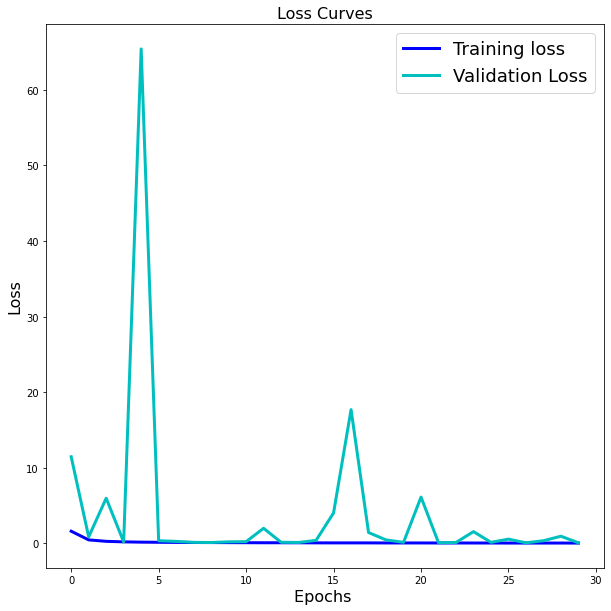

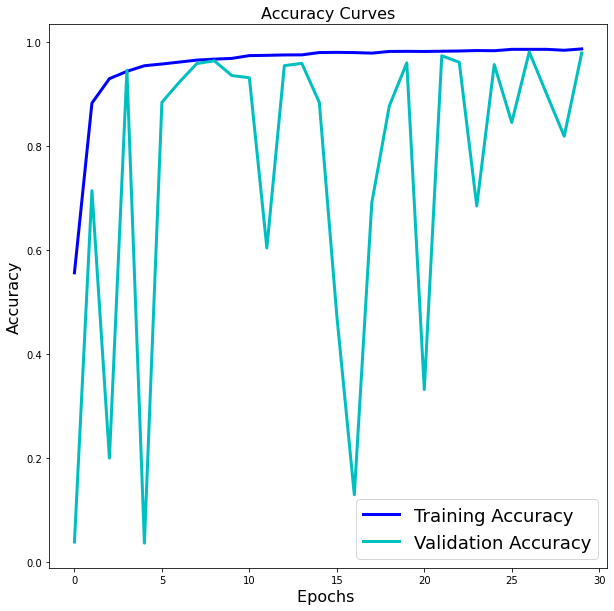

In [ ]:
plot_loss_accuracy(arabic_history)

load the model


In [ ]:
model.load_weights('weights.hdf5')

# testing

In [ ]:
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 1s 6ms/step - loss: 0.0790 - accuracy: 0.9804
Test Accuracy: 0.9803571701049805
Test Loss: 0.07898306846618652


change epoch


Epoch 1/60
336/336 [==============================] - 13s 33ms/step - loss: 0.0399 - accuracy: 0.9885 - val_loss: 0.0842 - val_accuracy: 0.9777

Epoch 00001: val_loss improved from inf to 0.08422, saving model to weights.hdf5
Epoch 2/60
336/336 [==============================] - 10s 31ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0834 - val_accuracy: 0.9789

Epoch 00002: val_loss improved from 0.08422 to 0.08342, saving model to weights.hdf5
Epoch 3/60
336/336 [==============================] - 10s 29ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 4.3081 - val_accuracy: 0.5268

Epoch 00003: val_loss did not improve from 0.08342
Epoch 4/60
336/336 [==============================] - 10s 31ms/step - loss: 0.0375 - accuracy: 0.9888 - val_loss: 0.0809 - val_accuracy: 0.9777

Epoch 00004: val_loss improved from 0.08342 to 0.08095, saving model to weights.hdf5
Epoch 5/60
336/336 [==============================] - 10s 29ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 20.7

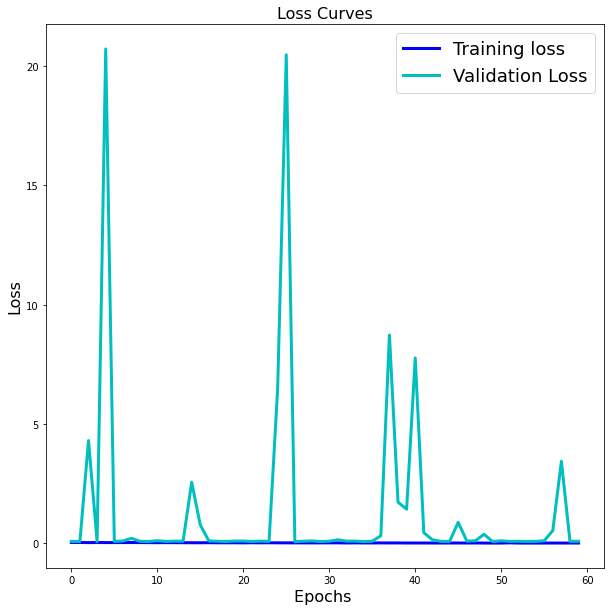

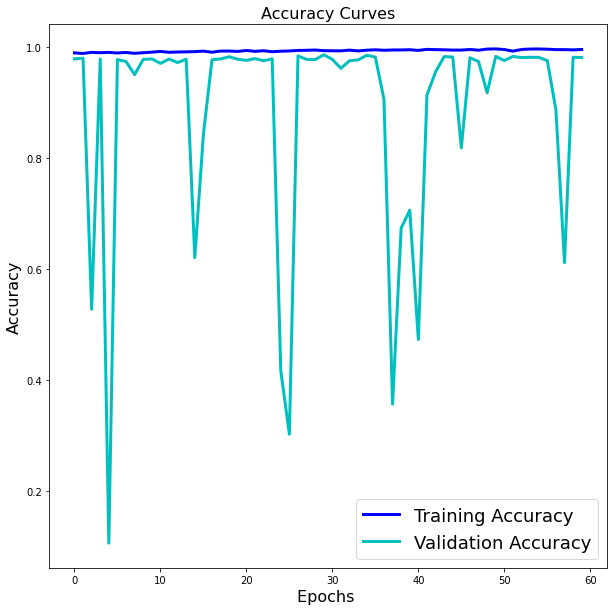

In [ ]:
epochs = 60
batch_size = 40

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')
plot_loss_accuracy(history)

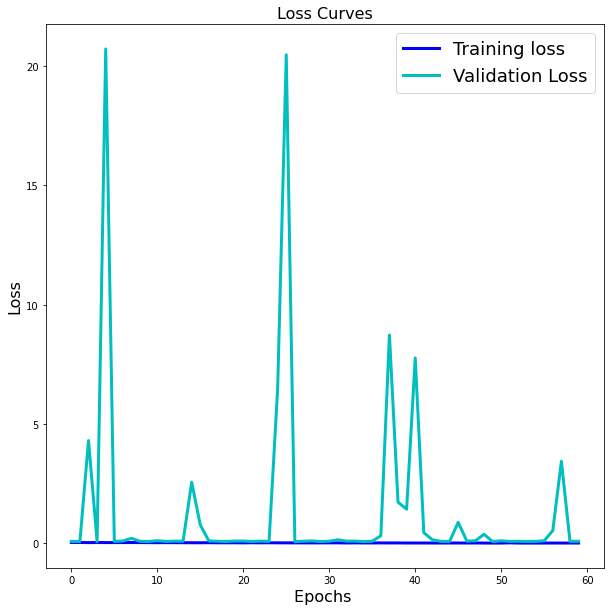

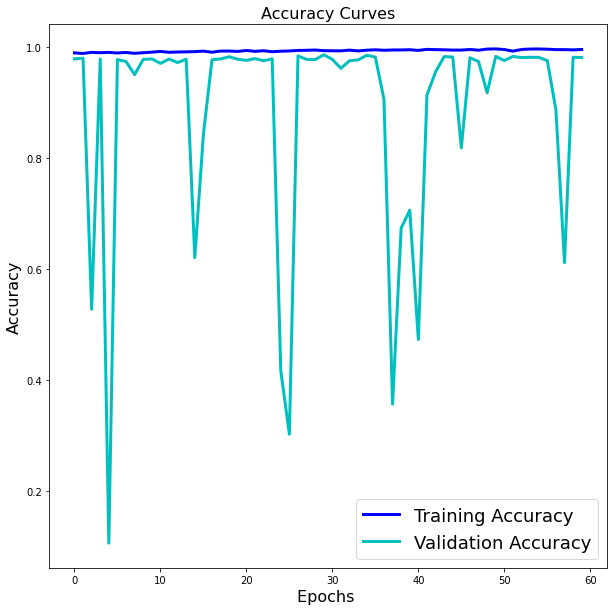

In [ ]:
plot_loss_accuracy(history)

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 1s 7ms/step - loss: 0.0752 - accuracy: 0.9830
Test Accuracy: 0.9830357432365417
Test Loss: 0.07524512708187103


save the model


In [ ]:
from keras.models import model_from_yaml
model_yaml = model.to_yaml()
with open("/content/drive/MyDrive/arabic/dataset/model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model.save_weights("/content/drive/MyDrive/arabic/dataset/model.h5")
print("Saved model to disk")

Saved model to disk


load model

In [ ]:
yaml_file = open('/content/drive/MyDrive/arabic/dataset/model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)

loaded_model.load_weights("/content/drive/MyDrive/arabic/dataset/model.h5")
print("Loaded model from disk")
 
loaded_model.compile(loss='crossentropy', optimizer='Nadam', metrics=['accuracy'])

Loaded model from disk


predict image


In [ ]:
from sklearn.metrics import classification_report


def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

def get_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))

y_pred, y_true = get_predicted_classes(model,  testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      0.99      1.00       120
           3       0.95      0.99      0.97       120
           4       1.00      0.97      0.98       120
           5       1.00      1.00      1.00       120
           6       0.97      1.00      0.98       120
           7       1.00      0.98      0.99       120
           8       0.96      0.98      0.97       120
           9       0.93      0.96      0.95       120
          10       0.96      0.99      0.98       120
          11       0.99      0.91      0.95       120
          12       1.00      0.98      0.99       120
          13       0.99      1.00      1.00       120
          14       0.95      1.00      0.98       120
          15       1.00      0.97      0.99       120
          16       0.96      1.00      0.98       120
          17       1.00      0.96      0.98       120
          18       1.00    

final result

In [ ]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index

def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]

def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true-1)
  predicted_label = convert_categorical_label_to_real_label(y_pred-1)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label , predicted_label

The following image has the written character 'ت' but the model predicted it as 'ت'
The following image has the written character 'ى' but the model predicted it as 'ى'
The following image has the written character 'و' but the model predicted it as 'و'
The following image has the written character 'ق' but the model predicted it as 'ق'
The following image has the written character 'ل' but the model predicted it as 'ل'
The following image has the written character 'ج' but the model predicted it as 'ج'


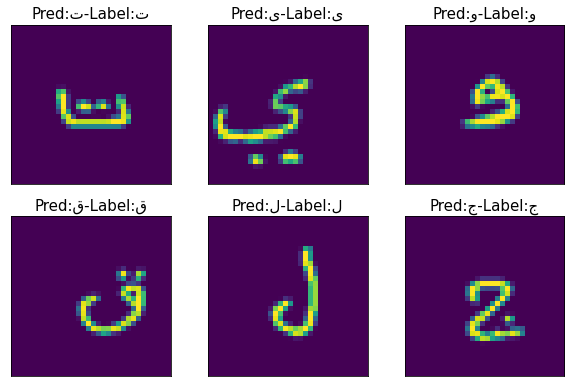

In [ ]:
plt.figure(figsize=(10,10)) 
for idx in range(6):
    randy = random.randint(1,3360)
    true_label ,predicted_label= show_example(randy)
    img = (pixels_to_images(testing_letters_images.loc[randy], True))
    subplot_title = ("Pred:{}-Label:{}".format(predicted_label, true_label))
    plt.subplot(3,3,idx+1)
    plt.title(subplot_title, size=15)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

test again

The following image has the written character 'غ' but the model predicted it as 'غ'


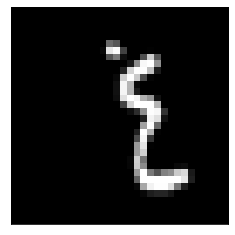

The following image has the written character 'ل' but the model predicted it as 'ل'


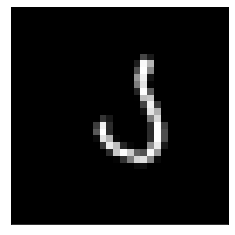

The following image has the written character 'غ' but the model predicted it as 'غ'


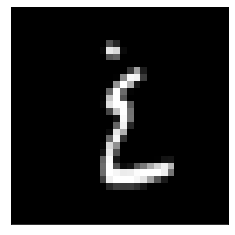

The following image has the written character 'ع' but the model predicted it as 'ع'


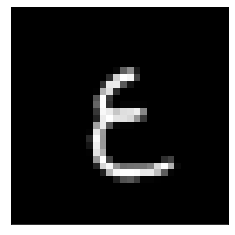

The following image has the written character 'ض' but the model predicted it as 'ض'


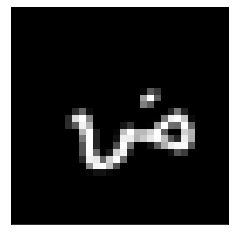

In [ ]:
import random
for idx in range(5):
    randy = random.randint(1,3360)
    show_example(randy)
    plt.imshow(pixels_to_images(testing_letters_images.loc[randy], True), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# **Persian Charecter Classification :**


Persian Dataset a zip contain of full images


approach :

1. unziping folder of images.
2.resize each image
3.convert pixels to float
4.normalize them between 0-1 instead of 0-255


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# !unzip "/content/drive/MyDrive/persiandataset/PersianDataset.zip" -d "/content/drive/MyDrive/persiandataset/persiandataset"

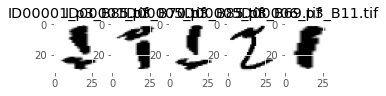

In [ ]:
plt.figure(figsize=(5,5))

random_plot = "/content/drive/MyDrive/persiandataset/PersianDataset/validation/ALEF"

for i in range(5):
  file = random.choice(os.listdir(random_plot))
  image_path= os.path.join(random_plot, file)
  img=mpimg.imread(image_path)
  img = cv2.resize(img, (32, 32))
  ax=plt.subplot(1,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [ ]:
IMG_WIDTH=64
IMG_HEIGHT=64
img_folder='/content/drive/MyDrive/persiandataset/persiandataset/PersianDataset/train'

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
img_data, class_name =create_dataset('/content/drive/MyDrive/persiandataset/persiandataset/PersianDataset/train')
print(np.unique(class_name))
print(len(class_name))

['ALEF' 'BE' 'CHE' 'DAL' 'EIN' 'FE' 'GAF' 'GHAF' 'GHEIN' 'HE' 'HE2' 'JIM'
 'KAF' 'KHE' 'LAM' 'MIM' 'NON' 'PE' 'RE' 'SAD' 'SE3' 'SHIN' 'SIN' 'TA'
 'TE' 'VAV' 'YEH' 'ZA' 'ZAD' 'ZAL' 'ZE' 'ZHE']
37109


In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
print(target_dict)

{'ALEF': 0, 'BE': 1, 'CHE': 2, 'DAL': 3, 'EIN': 4, 'FE': 5, 'GAF': 6, 'GHAF': 7, 'GHEIN': 8, 'HE': 9, 'HE2': 10, 'JIM': 11, 'KAF': 12, 'KHE': 13, 'LAM': 14, 'MIM': 15, 'NON': 16, 'PE': 17, 'RE': 18, 'SAD': 19, 'SE3': 20, 'SHIN': 21, 'SIN': 22, 'TA': 23, 'TE': 24, 'VAV': 25, 'YEH': 26, 'ZA': 27, 'ZAD': 28, 'ZAL': 29, 'ZE': 30, 'ZHE': 31}


In [ ]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
len(target_val)

37109

In [ ]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(64,64, 3)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32)
        ])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 31, 31, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                921632    
Total params: 997,280
Trainable params: 997,280
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

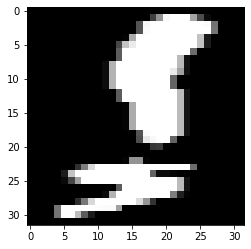

In [ ]:
image= cv2.imread('/content/ID00006_p3_B85.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
image = 255 - image
image = image.astype(float) / 255
plt.imshow(image,cmap='gray')

In [ ]:
!unzip "/content/drive/MyDrive/dataset/Persian.zip" -d "/content/drive/MyDrive/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000101_p3_B23.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000101_p3_B53.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000101_p3_B80.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000101_p3_B84.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000102_p3_B23.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000102_p3_B53.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000102_p3_B80.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000102_p3_B84.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000103_p3_B23.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000103_p3_B53.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000103_p3_B80.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/YEH/ID0000103_p3_B84.tif  
 

In [ ]:
!unzip '/content/drive/MyDrive/dataset/Persian.zip' -d '/content/drive/MyDrive/dataset/Persian'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000101_p3_B23.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000101_p3_B53.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000101_p3_B80.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000101_p3_B84.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000102_p3_B23.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000102_p3_B53.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000102_p3_B80.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000102_p3_B84.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000103_p3_B23.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000103_p3_B53.tif  
  inflating: /content/drive/MyDrive/dataset/Persian/Persian/YEH/ID0000103_p3_B8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
DATA_TRAIN_PATH='/content/drive/MyDrive/dataset/Persian/Persian'
train_datagen = ImageDataGenerator()
IMG_WIDTH =32
IMG_HEIGHT =32
EPOCHS=60
BATCH_SIZE=500
train_generator  = train_datagen.flow_from_directory(
        DATA_TRAIN_PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 37972 images belonging to 32 classes.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(32,32, 3)))
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(32, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [ ]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
H = model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=True)

Epoch 1/60
76/76 [==============================] - 73s 953ms/step - loss: 5.4877 - accuracy: 0.0759
Epoch 2/60
76/76 [==============================] - 74s 970ms/step - loss: 2.8142 - accuracy: 0.1988
Epoch 3/60
76/76 [==============================] - 74s 970ms/step - loss: 1.9091 - accuracy: 0.4231
Epoch 4/60
76/76 [==============================] - 72s 951ms/step - loss: 1.2787 - accuracy: 0.5994
Epoch 5/60
76/76 [==============================] - 71s 933ms/step - loss: 0.9980 - accuracy: 0.6855
Epoch 6/60
76/76 [==============================] - 71s 933ms/step - loss: 0.8207 - accuracy: 0.7424
Epoch 7/60
76/76 [==============================] - 72s 946ms/step - loss: 0.6945 - accuracy: 0.7839
Epoch 8/60
76/76 [==============================] - 73s 956ms/step - loss: 0.6138 - accuracy: 0.8077
Epoch 9/60
76/76 [==============================] - 72s 944ms/step - loss: 0.5483 - accuracy: 0.8287
Epoch 10/60
76/76 [==============================] - 72s 944ms/step - loss: 0.5068 - accura

In [ ]:
print(train_generator)
print(train_generator.class_indices.keys())

dict_keys(['ALEF', 'BE', 'CHE', 'DAL', 'EIN', 'FE', 'GAF', 'GHAF', 'GHEIN', 'HE', 'HE2', 'JIM', 'KAF', 'KHE', 'LAM', 'MIM', 'NON', 'PE', 'RE', 'SAD', 'SE3', 'SHIN', 'SIN', 'TA', 'TE', 'VAV', 'YEH', 'ZA', 'ZAD', 'ZAL', 'ZHE', 'Ze'])


In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/save/persian_classifier_lenet.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("/content/drive/MyDrive/save/persian_weight_classifier_lenet.h5")
print("Saved model to disk")

Saved model to disk


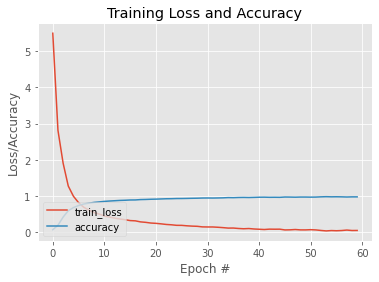

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

# **Test**

In [ ]:
json_file = open('/content/drive/MyDrive/save/persian_classifier_lenet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/save/persian_weight_classifier_lenet.h5")
print("Loaded model from disk")

Loaded model from disk


[[1.12623051e-14 7.86159467e-03 2.77607143e-03 5.92160786e-16
  3.31173624e-06 1.27846435e-14 3.73797597e-08 1.48201257e-10
  1.09083942e-06 6.81622438e-08 6.13127084e-12 1.49524200e-03
  1.23760226e-04 2.43483484e-03 8.56944724e-11 2.49641907e-09
  5.39563736e-08 9.69438672e-01 2.97411432e-20 1.84950250e-10
  4.74160409e-08 1.00307841e-06 5.16689056e-08 4.35690497e-15
  6.53141186e-08 8.26104020e-17 1.58639941e-02 2.47365968e-08
  1.99059468e-14 1.59143539e-07 8.56016855e-11 2.66216045e-18]]
[17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
['ALEF', 'BE', 'CHE', 'DAL', 'EIN', 'FE', 'GAF', 'GHAF', 'GHEIN', 'HE', 'HE2', 'JIM', 'KAF', 'KHE', 'LAM', 'MIM', 'NON', 'PE', 'RE', 'SAD', 'SE3', 'SHIN', 'SIN', 'TA', 'TE', 'VAV', 'YEH', 'ZA', 'ZAD', 'ZAL', 'ZE', 'ZHE']
PE


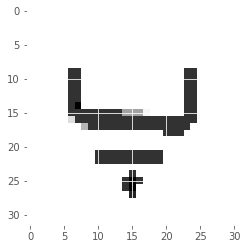

In [ ]:
image = cv2.imread("p.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
# image = np.expand_dims(image, axis=3)
image = np.expand_dims(image, axis=0)
# image = 255 - image
# image = image.astype(float) / 255
p = model.predict(image)
print(p)
index = np.argmax(model.predict(image), axis=-1)
print(np.argmax(model.predict(image), axis=-1))
list_dict_val = list((train_generator.class_indices.values()))
list_dict_key = list((train_generator.class_indices.keys()))
print(list_dict_val)
print(list_dict_key)
position = list_dict_val.index(index)
print(list_dict_key[position])
plt.imshow(image[0, ..., 0], cmap='gray')

vgg


In [ ]:
!unzip '/content/drive/MyDrive/persiandataset/PersianDataset.zip' -d '/content/drive/MyDrive/persiandataset/vali'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000314_p3_B23.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000314_p3_B53.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000314_p3_B80.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000314_p3_B84.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000315_p3_B23.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000315_p3_B53.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000315_p3_B80.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000315_p3_B84.tif  
  inflating: /content/drive/MyDrive/persiandataset/vali/PersianDataset/train/YEH/ID0000316_p3_B23.tif  
  inflating: 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
DATA_TRAIN_PATH='/content/drive/MyDrive/persiandataset/PersianDataset/train'
DATA_VALIDATION_PATH ='/content/drive/MyDrive/persiandataset/PersianDataset/validation'
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

IMG_WIDTH =32
IMG_HEIGHT =32
EPOCHS_VGG=60
BATCH_SIZE_VGG=500

train_generator  = train_datagen.flow_from_directory(
        DATA_TRAIN_PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE_VGG,
        class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
        DATA_VALIDATION_PATH,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE_VGG,
        class_mode='categorical')

Found 37109 images belonging to 32 classes.
Found 861 images belonging to 32 classes.


In [ ]:
model_vgg = keras.Sequential()
model_vgg.add(keras.layers.InputLayer(input_shape=(32,32, 3)))
model_vgg.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'))
model_vgg.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(keras.layers.Flatten())
model_vgg.add(keras.layers.Dense(units=80, activation='relu'))
model_vgg.add(keras.layers.Dense(units=80, activation='relu'))
model_vgg.add(keras.layers.Dense(32, activation='softmax'))
model_vgg.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
from keras.models import model_from_json
resume = '/content/drive/MyDrive/vgg/vgg16_2.h5'
if os.path.isfile(resume):
    print ("Resumed model's weights from {}".format(resume))
    json_file = open('/content/drive/MyDrive/vgg/save_vgg.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_vgg.load_weights(resume)

Resumed model's weights from /content/drive/MyDrive/vgg/vgg16_2.h5


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

loss = 'categorical_crossentropy'
optimizer = 'adam'
model_vgg.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
checkpoint = ModelCheckpoint("/content/drive/MyDrive/vgg/vgg16_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
res_vgg = model_vgg.fit_generator(train_generator,
                    steps_per_epoch=int(37109/700),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=int(861/700),
                    callbacks=[checkpoint])


model_json = model_vgg.to_json()
with open("/content/drive/MyDrive/vgg/save/save_vgg.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
 1/53 [..............................] - ETA: 2:57:01 - loss: 0.0579 - accuracy: 0.9820

KeyboardInterrupt: ignored

In [ ]:
json_file = open('/content/drive/MyDrive/vgg_f/save_vgg_gpu.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/vgg_f/vgg16_3_gpu.h5")
print("Loaded model from disk")

Loaded model from disk


[[9.99994874e-01 2.65606683e-13 3.74069353e-09 1.62077785e-09
  1.73079542e-07 6.15663325e-08 3.33833763e-16 1.30916464e-14
  3.27260641e-09 7.42366435e-09 4.32511160e-06 4.97393203e-11
  2.48034761e-14 1.54919721e-08 4.99524333e-07 8.23659541e-09
  1.76104749e-08 1.07781004e-14 2.86262902e-09 1.40804024e-17
  3.29513881e-11 4.61751785e-13 1.73511796e-19 2.92547965e-11
  2.02794087e-14 1.01937503e-09 1.37544642e-10 1.06880966e-16
  6.40445474e-14 1.07351815e-10 3.43043314e-17 1.47999310e-18]]
[0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
['ALEF', 'BE', 'CHE', 'DAL', 'EIN', 'FE', 'GAF', 'GHAF', 'GHEIN', 'HE', 'HE2', 'JIM', 'KAF', 'KHE', 'LAM', 'MIM', 'NON', 'PE', 'RE', 'SAD', 'SE3', 'SHIN', 'SIN', 'TA', 'TE', 'VAV', 'YEH', 'ZA', 'ZAD', 'ZAL', 'ZE', 'ZHE']
ALEF


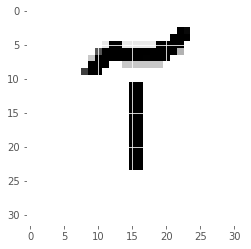

In [ ]:
image = cv2.imread("/content/drive/MyDrive/vgg_f/a.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
# image = np.expand_dims(image, axis=3)
image = np.expand_dims(image, axis=0)
# image = 255 - image
# image = image.astype(float) / 255
p = loaded_model.predict(image)
print(p)
index = np.argmax(loaded_model.predict(image), axis=-1)
print(np.argmax(loaded_model.predict(image), axis=-1))
list_dict_val = list((train_generator.class_indices.values()))
list_dict_key = list((train_generator.class_indices.keys()))
print(list_dict_val)
print(list_dict_key)
position = list_dict_val.index(index)
print(list_dict_key[position])
plt.imshow(image[0, ..., 0], cmap='gray')

In [ ]:
N = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, loaded_model.history["loss"], label="train_loss")
plt.plot(N, loaded_model.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

TypeError: ignored

<Figure size 432x288 with 0 Axes>

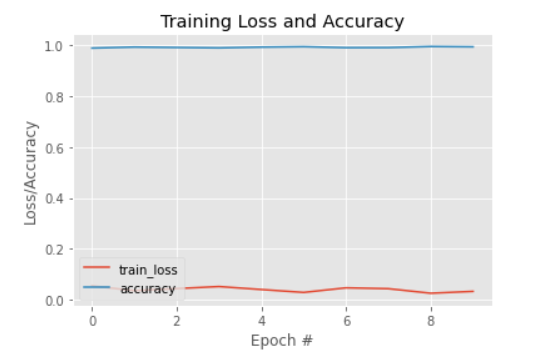

### **Training Resnet For persian vocabulary**

In [ ]:
!unzip  '/content/drive/MyDrive/dataset/PersianWords.zip' -d '/content/drive/MyDrive/dataset/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000421_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000422_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000423_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000424_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000425_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000426_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000427_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000428_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID0000429_p5_B26.tif  
  inflating: /content/drive/MyDrive/dataset/PersianWords/train/TWELVE/ID000042_p5_B26.tif  
  inflating: /conten

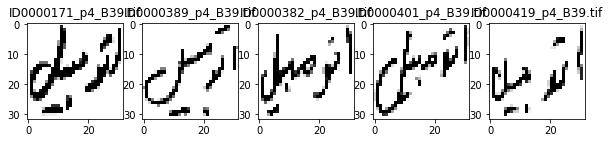

In [ ]:
plt.figure(figsize=(10,10))

random_plot = '/content/drive/MyDrive/dataset/PersianWords/train/AUTOMOBILE'

for i in range(5):
  file = random.choice(os.listdir(random_plot))
  image_path= os.path.join(random_plot, file)
  img=mpimg.imread(image_path)
  img = cv2.resize(img, (32, 32))
  ax=plt.subplot(1,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [ ]:
train_path = '/content/drive/MyDrive/dataset/PersianWords/train'
validation_path = '/content/drive/MyDrive/dataset/PersianWords/validation'

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(32, 32),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(validation_path,target_size=(32,32),batch_size=32,shuffle=False,class_mode='categorical')

Found 61212 images belonging to 125 classes.
Found 1252 images belonging to 125 classes.


In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(32, 32,3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    print(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(32, 32, 3))

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 2048), dtype=tf.float32, name=None), name='average_pooling2d/AvgPool:0', description="created by layer 'average_pooling2d'")


In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(125,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [ ]:
model.load_weights("/content/drive/MyDrive/resnet/best_model_f.h5")
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/resnet/best_model_f.h5', monitor='val_accuracy', mode='auto')

In [ ]:
opt = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])

NameError: ignored

In [ ]:
eval = model.evaluate(test_generator)

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/resnet/model_f.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
N = np.arange(0, 60)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, resnet.history["loss"], label="train_loss")
plt.plot(N, resnet.history["accuracy"], label="accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
from keras.models import model_from_json
def predict_(image_path):
  json_file = open('/content/drive/MyDrive/resnet/model_f.json', 'r')
  model_json_c = json_file.read()
  json_file.close()

  model_c = model_from_json(model_json_c)
  model_c.load_weights("/content/drive/MyDrive/resnet/best_model_f.h5")

  opt = SGD(learning_rate=1e-4, momentum=0.9)
  model_c.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])



  image = cv2.imread(image_path)
  image = cv2.resize(image, (32, 32))
  image = np.expand_dims(image, axis=0)
  p = model_c.predict(image)
  print(p)
  index = np.argmax(model_c.predict(image), axis=-1)
  print(np.argmax(model_c.predict(image), axis=-1))
  list_dict_val = list((train_generator.class_indices.values()))
  list_dict_key = list((train_generator.class_indices.keys()))
  print(list_dict_val)
  print(list_dict_key)
  position = list_dict_val.index(index)
  print(list_dict_key[position])
  plt.imshow(image[0, ..., 0], cmap='gray')

In [ ]:
res = predict_('/content/t.png')